In [13]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.datasets import mnist

In [14]:
(X_train,_),(X_test,_) = mnist.load_data()

In [15]:
X_train.shape

(60000, 28, 28)

In [16]:
X_train = X_train.reshape(X_train.shape[0],784)
X_test = X_test.reshape(X_test.shape[0],784)

In [17]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# 784->128->784

In [19]:
encoding_dim = 128

In [28]:
# Encoder
x = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='sigmoid')(x)

# Decoder
decoded = Dense(784,activation='sigmoid')(encoded)
autoencder = Model(x,decoded)

In [29]:
autoencder.compile(optimizer="adam",loss='mse',metrics=['acc'])

autoencder.fit(X_train,X_train,epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 14s 238us/sample - loss: 0.0368 - acc: 0.0119
Epoch 2/10
60000/60000 [==============================] - 14s 229us/sample - loss: 0.0139 - acc: 0.0125
Epoch 3/10
60000/60000 [==============================] - 13s 213us/sample - loss: 0.0087 - acc: 0.0132
Epoch 4/10
60000/60000 [==============================] - 13s 223us/sample - loss: 0.0064 - acc: 0.0135
Epoch 5/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0051 - acc: 0.0138
Epoch 6/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0042 - acc: 0.0138
Epoch 7/10
60000/60000 [==============================] - 13s 224us/sample - loss: 0.0036 - acc: 0.0139
Epoch 8/10
60000/60000 [==============================] - 14s 231us/sample - loss: 0.0031 - acc: 0.0139
Epoch 9/10
60000/60000 [==============================] - 14s 228us/sample - loss: 0.0028 - acc: 0.0141
Epoch 10/10
60000/60000 [================

In [30]:
encoder = Model(x,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoded_layer = autoencder.layers[-1]

decoder = Model(encoded_input,decoded_layer(encoded_input))

In [32]:
encoded_img = encoder.predict(X_test)
decoded_img = decoder.predict(encoded_img)

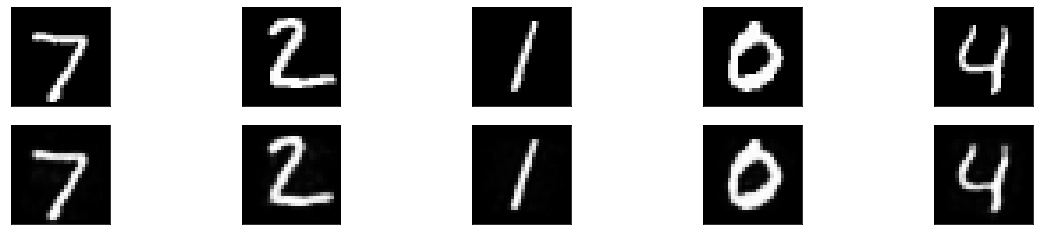

In [37]:
import matplotlib.pyplot as plt

n = 5

plt.figure(figsize=(20,4))
for i in range(n):
    
    ax=plt.subplot(2,n,i+1)
    plt.imshow(X_test[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_img[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()